In [37]:
import warnings
warnings.filterwarnings('ignore')
# The contact count numbers in Xa Xi specific loop region 
import pandas as pd

In [29]:
%%bash
##hic
hicfile="/data2/linzhuobin/Temp/hi-c_hg19/maternal/GSE63525_GM12878_diploid_maternal.hic"  
java -jar /home/zyserver/software/Juicebox/juicer_tools_1.22.01.jar dump observed NONE $hicfile X:114950000:115050000 X:130850000:130950000 BP 5000 chrX_maternal_loop.txt

hicfile="/data2/linzhuobin/Temp/hi-c_hg19/paternal/GSE63525_GM12878_diploid_paternal.hic" 
java -jar /home/zyserver/software/Juicebox/juicer_tools_1.22.01.jar dump observed NONE $hicfile X:114950000:115050000 X:130850000:130950000 BP 5000 chrX_paternal_loop.txt

WARN [2024-06-20T17:55:56,631]  [Globals.java:138] [main]  Development mode is enabled
WARN [2024-06-20T17:55:57,242]  [Globals.java:138] [main]  Development mode is enabled


In [31]:
# %%bash
# # hic
# hicfile="/data2/linzhuobin/Temp/hi-c_hg19/maternal/GSE63525_GM12878_diploid_maternal.hic"  
# java -jar /home/zyserver/software/Juicebox/juicer_tools_1.22.01.jar dump observed NONE $hicfile X:114900000:115100000 X:130800000:131000000 BP 5000 chrX_maternal_loop.txt

# hicfile="/data2/linzhuobin/Temp/hi-c_hg19/paternal/GSE63525_GM12878_diploid_paternal.hic" 
# java -jar /home/zyserver/software/Juicebox/juicer_tools_1.22.01.jar dump observed NONE $hicfile X:114900000:115100000 X:130800000:131000000 BP 5000 chrX_paternal_loop.txt

In [30]:
# # Hi-C  X:114900000:115100000 X:130800000:131000000
# def Hic_contacts(filename):
#     with open(filename, 'r') as file:
#         total_contacts = 0
#         for line in file:
#             parts = line.strip().split()
#             # 假设contacts数在每行的最后一个位置
#             contacts = float(parts[-1])
#             total_contacts += contacts
#     total_contacts = int(total_contacts)
#     print(f"{filename}: { total_contacts }")
#     return(total_contacts)

# mc = Hic_contacts("chrX_maternal_loop.txt")
# pc = Hic_contacts("chrX_paternal_loop.txt")
# print(f"Hi-C p/m:{pc/mc:.3f}")

In [77]:
# Hic
# def Hic_contacts(filename):
#     with open(filename, 'r') as file:
#         total_contacts = 0
#         for line in file:
#             parts = line.strip().split()
#             # 假设contacts数在每行的最后一个位置
#             contacts = float(parts[-1])
#             total_contacts += contacts
#     total_contacts = int(total_contacts)
#     print(f"{filename}: { total_contacts }")
#     return(total_contacts)

# mc = Hic_contacts("chrX_maternal_loop.txt")
# pc = Hic_contacts("chrX_paternal_loop.txt")
# print(f"Hi-C p/m:{pc/mc:.3f}")

chrX_maternal_loop.txt: 21
chrX_paternal_loop.txt: 112
Hi-C p/m:5.333


In [32]:
# Specific Loops
chrom = "chrX"
region1 = [114_950_000, 115_050_000]
region2 = [130_850_000, 130_950_000]
# region1 = [114_900_000, 115_100_000]
# region2 = [130_800_000, 131_000_000]

In [33]:
def Loop_PairwiseContact_Count(filename):
    columns_to_read = [2, 3, 6, 7]  # 相当于第3、第4、第7、第8列
    df = pd.read_csv(filename , sep=r'[ \t]+', header=None, usecols=columns_to_read,engine='python')

    condition = (
        ( df[2]=="chrX" ) & 
        ( df[6]=="chrX" ) &
        ( df[3].between(region1[0], region1[1]) ) & 
        ( df[7].between(region2[0], region2[1]) )
    )
    # 应用过滤条件，统计符合条件的行数
    count = df[condition].shape[0]
    df =None
    print(filename)
    print(f"The pairwise contacts in Loop region: {count}")
    return( count )

In [34]:
# NBT pore-c
filenames = ["/data1/chenying/dip3d/chrX-pore-c/chrX_HP1_hg19.jmatrix",
             "/data1/chenying/dip3d/chrX-pore-c/chrX_HP2_hg19.jmatrix"]
Counts = len(filenames)*[0]
for n, filename in enumerate(filenames):
    Counts[n] = Loop_PairwiseContact_Count(filename)

/data1/chenying/dip3d/chrX-pore-c/chrX_HP1_hg19.jmatrix
The pairwise contacts in Loop region: 145
/data1/chenying/dip3d/chrX-pore-c/chrX_HP2_hg19.jmatrix
The pairwise contacts in Loop region: 27


In [35]:
# Dip3d pipeline
filenames = ["/data1/chenying/dip3d/chrX-dip3d/chrX_HP1_hg19.jmatrix",
             "/data1/chenying/dip3d/chrX-dip3d/chrX_HP2_hg19.jmatrix"]
Counts = len(filenames)*[0]
for n, filename in enumerate(filenames):
    Counts[n] = Loop_PairwiseContact_Count(filename)

/data1/chenying/dip3d/chrX-dip3d/chrX_HP1_hg19.jmatrix
The pairwise contacts in Loop region: 197
/data1/chenying/dip3d/chrX-dip3d/chrX_HP2_hg19.jmatrix
The pairwise contacts in Loop region: 26


In [36]:
#print("Dip3d:",197/26)
#print("NBT Pore-C:",145/27)
print("NBT Pore-C:",459/95) # NBT Pore-C: 4.831578947368421
print("Dip3d:",616/118) # Dip3d: 5.220338983050848

NBT Pore-C: 4.831578947368421
Dip3d: 5.220338983050848


In [6]:
print("Dip3d:",197/26)
print("NBT Pore-C:",145/27)

Dip3d: 7.576923076923077
NBT Pore-C: 5.37037037037037


In [38]:
import cooltools
import cooler
import pandas as pd
import bioframe
import numpy as np
import pyBigWig
import bbi
import copy
import pybedtools
import warnings
warnings.filterwarnings('ignore')

In [39]:
from coolpuppy import coolpup
from coolpuppy.lib import numutils
from coolpuppy.lib.puputils import divide_pups
from coolpuppy import plotpup
from cooltools import expected_cis, expected_trans
from cooltools.lib import plotting

In [40]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import LogNorm
import matplotlib as mpl
from matplotlib import rcParams 
mpl.rcParams['pdf.fonttype'] = 42
rcParams['pdf.fonttype'] = 42 # True font
rcParams['font.size'] =  8  
rcParams['grid.linewidth'] =  0.5 
rcParams['lines.color'] = 'b' 
rcParams['lines.linewidth'] = 1 
rcParams['lines.markersize'] = 3
rcParams['lines.markeredgewidth'] = 0 # set Marker with no edgelines
rcParams['axes.linewidth'] = 0.5
rcParams['axes.titlesize'] = 12
rcParams['axes.labelsize'] = 8
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8
rcParams['legend.fontsize'] = 8
rcParams['legend.title_fontsize'] = 8

In [60]:
def APAscores_v1(agg_matrix):
    # total bins = 20
    # center region = 3 x 3 bins
    centerbins = 2
    center_row = agg_matrix.shape[0] // 2
    center_col = agg_matrix.shape[1] // 2
    center_region = agg_matrix[center_row-centerbins:center_row+centerbins+1, center_col-centerbins:center_col+centerbins+1]
    # 计算中心区域的平均contact值
    center_avg = np.nanmean(center_region)
    cornerbins = 10 # coner =15 x 15 bins (2/3)
    # 为每个角落定义一个切片，并计算四个角落的平均值和比值
    corners = {
        'top_left': agg_matrix[:cornerbins, :cornerbins],
        'top_right': agg_matrix[:cornerbins, -1*cornerbins:],
        'bottom_left': agg_matrix[ -1*cornerbins:, : cornerbins],
        'bottom_right': agg_matrix[ -1*cornerbins:,  -1*cornerbins:]
    }

    # 初始化比值字典
    ratios = {}
    # 计算每个角落的平均contact值以及与中心区域的比值
    for corner_name, corner_matrix in corners.items():
        corner_avg = np.nanmean(corner_matrix)
        ratio = center_avg / corner_avg
        ratios[corner_name] = ratio
    # 打印每个角落的平均值与中心平均值的比率
    for corner_name, ratio in ratios.items():
        print(f"{corner_name}: {ratio:.2f}")
    return(ratios)


def APAscores(agg_matrix):
    # total bins = 20
    # center region = 3 x 3 bins
    center_row = agg_matrix.shape[0] // 2
    center_col = agg_matrix.shape[1] // 2
    center_region = agg_matrix[center_row-2:center_row+3, center_col-2:center_col+3]
    # 计算中心区域的平均contact值
    center_avg = np.nanmean(center_region)
    cornerbins = 15 # coner =15 x 15 bins (2/3)
    # 为每个角落定义一个切片，并计算四个角落的平均值和比值
    corners = {
        'top_left': agg_matrix[:cornerbins, :cornerbins],
        'top_right': agg_matrix[:cornerbins, -1*cornerbins:],
        'bottom_left': agg_matrix[ -1*cornerbins:, : cornerbins],
        'bottom_right': agg_matrix[ -1*cornerbins:,  -1*cornerbins:]
    }

    # 初始化比值字典
    ratios = {}
    # 计算每个角落的平均contact值以及与中心区域的比值
    for corner_name, corner_matrix in corners.items():
        corner_avg = np.nanmean(corner_matrix)
        ratio = center_avg / corner_avg
        ratios[corner_name] = ratio
    # 打印每个角落的平均值与中心平均值的比率
    for corner_name, ratio in ratios.items():
        print(f"{corner_name}: {ratio:.2f}")
    return(ratios)

In [42]:
# loop regions
paired_sites = pd.DataFrame({"chrom1": ["X"],
                           "start1": [114_950_000],
                           "end1": [115_050_000],
                           "chrom2": ["X"],
                           "start2": [130_850_000],
                           "end2": [130_950_000]} )
paired_sites

,chrom1,start1,end1,chrom2,start2,end2
0,X,114950000,115050000,X,130850000,130950000


In [61]:
def PlotAPA(pipeline, coolfile, paired_sites ,resolution):
    #rawdir = "/data2/zjy/Dip3D/dip3d_pipline_v2"
    coolfile = f"{coolfile}::/resolutions/{resolution}"
    hic = cooler.Cooler(coolfile)
    # bioframe
    chromnames = [f"chr{i}" for i in hic.chromnames ]
    chromnames.extend(["chrX", "chrY", "chrMT"])
    hg19_chromsizes=bioframe.fetch_chromsizes("hg19")
    # hg19_chromsizes = hg19_chromsizes[ hg19_chromsizes.index !='chrM']
    hg19_cens = bioframe.fetch_centromeres("hg19")
    hg19_arms = bioframe.make_chromarms(hg19_chromsizes, hg19_cens)
    hg19_arms = hg19_arms.loc[hg19_arms["chrom"].isin(chromnames), :]
    # replace the chrom names
    hg19_arms["chrom"] = hg19_arms["chrom"].str.replace("chr", "")
    hg19_arms["name"] = hg19_arms["name"].str.replace("chr", "")

    # expected
    #expected = cooltools.expected_cis(hic, view_df=hg19_arms, nproc=20, chunksize=1_000_000)
    figmat = cooltools.pileup(hic, paired_sites, view_df=hg19_arms, flank=500_000)
    mtx=np.nanmean(figmat[:,::-1, ::-1], axis=0)

    fig, ax = plt.subplots(1, figsize=(4,4))
    im = ax.imshow( np.log2(mtx), 
                  cmap='coolwarm',interpolation='none')
    plt.colorbar(im, label = 'Normalized counts(log2)')
    plt.title(f"{pipeline}\nAPA_25kb_1Mb")
    
    # APA
    APAresults = APAscores(mtx)
    corner_size = 15
    adjpos = corner_size/2
    text_positions = {
        'top_left': (adjpos , adjpos ),
        'top_right': (mtx.shape[1]-adjpos , adjpos ),
        'bottom_left': (adjpos , mtx.shape[0]-adjpos ),
        'bottom_right': (mtx.shape[1]-adjpos , mtx.shape[0]-adjpos ),
    }
    for corner, pos in text_positions.items():
        plt.text(pos[0], pos[1], f"{APAresults[corner]:.2f}",
                 verticalalignment='top' if 'top' in corner else 'bottom',
                 horizontalalignment='left' if 'left' in corner else 'right',
                 color='black', fontsize=10, weight='bold')

    
    top_left_corner = (0, mtx.shape[0] - corner_size)
    top_right_corner = (mtx.shape[1] - corner_size, mtx.shape[0] - corner_size)
    bottom_left_corner = (0, 0)
    bottom_right_corner = (mtx.shape[1] - corner_size, 0)
    rectangles = {
        'top_left': patches.Rectangle(top_left_corner, corner_size, corner_size, linewidth=1, edgecolor='black', facecolor='none'),
        'top_right': patches.Rectangle(top_right_corner, corner_size, corner_size, linewidth=1, edgecolor='black', facecolor='none'),
        'bottom_left': patches.Rectangle(bottom_left_corner, corner_size, corner_size, linewidth=1, edgecolor='black', facecolor='none'),
        'bottom_right': patches.Rectangle(bottom_right_corner, corner_size, corner_size, linewidth=1, edgecolor='black', facecolor='none'),
       }
    for rect in rectangles.values():
        ax.add_patch(rect)

    # X and Y ticks
    ticks_pixels = np.linspace(0, 500_000*2//resolution, 5 )
    ticks_kbp = ((ticks_pixels-ticks_pixels[-1]/2)*resolution//1000).astype(int)
    ax.set_xlim([0, 40])
    ax.set_ylim([0, 40])
    ax.set(
           xticks=ticks_pixels,
           xticklabels=ticks_kbp,
           yticks=ticks_pixels,
           yticklabels=ticks_kbp,
           xlabel='Loop anchor, kbp' )
#     plt.show()
    plt.savefig(f"{pipeline}_APA_25kb_1Mb.pdf")

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 14 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'eight', 'five', 'four', 'nine', 'nonmarkingreturn', 'period', 'seven', 'six', 'space', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 14 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'eight', 'five', 'four', 'nine', 'nonmarkingreturn', 'period', 'seven', 'six', 'space', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 17, 19, 21, 22,

top_left: 4.52
top_right: 4.30
bottom_left: 7.69
bottom_right: 6.88


INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 15, 16, 19, 20, 21, 22, 24, 28, 36, 37, 47, 48, 49, 51, 55, 66, 68, 69, 70, 71, 72, 74, 75, 76, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 93, 3228]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 42 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'L', 'M', 'N', 'P', 'T', 'a', 'b', 'c', 'comma', 'd', 'e', 'five', 'g', 'h', 'hyphen', 'i', 'k', 'l', 'm', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'r', 's', 'space', 't', 'three', 'two', 'u', 'underscore', 'z', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 15, 16, 19, 20, 21, 22, 24, 28, 36, 37, 47, 48, 49, 51, 55, 66, 68, 69, 70, 71, 72, 74, 75, 76, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 93, 3228]
INFO:fontTools.subset:Closing glyph list over 'MATH': 42 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'L', 'M', 'N', 'P', 'T', 'a', 'b', 'c', 'comma', 'd', 'e', 

top_left: 3.20
top_right: 1.80
bottom_left: 2.30
bottom_right: 1.84


INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 42 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'L', 'M', 'N', 'P', 'T', 'a', 'b', 'c', 'comma', 'd', 'e', 'five', 'g', 'h', 'hyphen', 'i', 'k', 'l', 'm', 'minus', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'underscore', 'z', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 15, 16, 17, 19, 20, 21, 22, 24, 36, 37, 47, 48, 49, 51, 55, 66, 68, 69, 70, 71, 72, 74, 75, 76, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 93, 3228]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 42 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'L', 'M', 'N', 'P', 'T', 'a', 'b', 'c', 'comma', 'd', 'e', 'five', 'g', 'h', 'hyphen', 'i', 'k', 'l', 'm', 'minus', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'p

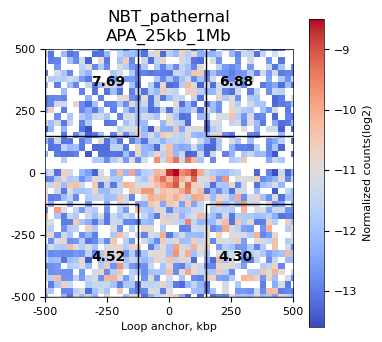

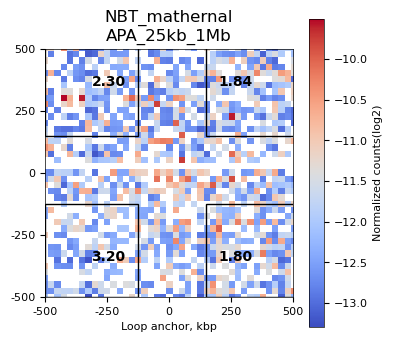

In [62]:
pipeline = "NBT_pathernal"
coolfile = "/data1/chenying/dip3d/chrX-pore-c/chrX_HP1_hg19_jmatrix.mcool"
resolution = 25_000
PlotAPA(pipeline, coolfile, paired_sites ,resolution)

pipeline = "NBT_mathernal"
coolfile = "/data1/chenying/dip3d/chrX-pore-c/chrX_HP2_hg19_jmatrix.mcool"
resolution = 25_000
PlotAPA(pipeline, coolfile, paired_sites ,resolution)

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 12 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'eight', 'five', 'four', 'nine', 'nonmarkingreturn', 'one', 'period', 'six', 'space', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 23, 24, 25, 27, 28]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 12 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'eight', 'five', 'four', 'nine', 'nonmarkingreturn', 'one', 'period', 'six', 'space', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 23, 24, 25, 27, 28]
INFO:fontTools.subset:Closi

top_left: 4.91
top_right: 4.60
bottom_left: 8.15
bottom_right: 8.05


INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 41 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'D', 'L', 'M', 'N', 'P', 'a', 'b', 'c', 'comma', 'd', 'e', 'five', 'g', 'h', 'hyphen', 'i', 'k', 'l', 'm', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'r', 's', 'space', 't', 'three', 'two', 'u', 'underscore', 'z', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 15, 16, 19, 20, 21, 22, 24, 28, 36, 39, 47, 48, 49, 51, 66, 68, 69, 70, 71, 72, 74, 75, 76, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 93, 3228]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 41 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'D', 'L', 'M', 'N', 'P', 'a', 'b', 'c', 'comma', 'd', 'e', 'five', 'g', 'h', 'hyphen', 'i', 'k', 'l', 'm', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft

top_left: 2.28
top_right: 1.30
bottom_left: 1.89
bottom_right: 1.35


INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 41 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'D', 'L', 'M', 'N', 'P', 'a', 'b', 'c', 'comma', 'd', 'e', 'five', 'g', 'h', 'hyphen', 'i', 'k', 'l', 'm', 'minus', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'space', 't', 'three', 'two', 'u', 'underscore', 'z', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 11, 12, 15, 16, 17, 19, 20, 21, 22, 24, 36, 39, 47, 48, 49, 51, 66, 68, 69, 70, 71, 72, 74, 75, 76, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 93, 3228]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 41 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'D', 'L', 'M', 'N', 'P', 'a', 'b', 'c', 'comma', 'd', 'e', 'five', 'g', 'h', 'hyphen', 'i', 'k', 'l', 'm', 'minus', 'n', 'nonmarkingreturn',

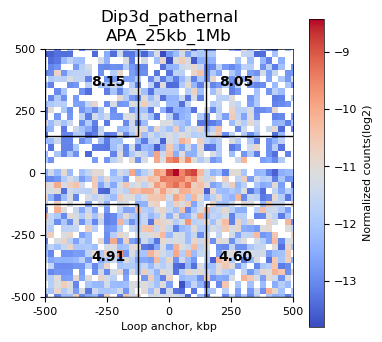

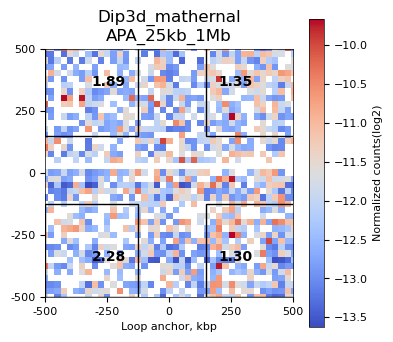

In [63]:
# Dip3d
pipeline = "Dip3d_pathernal"
coolfile = "/data1/chenying/dip3d/chrX-dip3d/chrX_HP1_hg19_jmatrix.mcool"
resolution = 25_000
PlotAPA(pipeline, coolfile, paired_sites ,resolution)

pipeline = "Dip3d_mathernal"
coolfile = "/data1/chenying/dip3d/chrX-dip3d/chrX_HP2_hg19_jmatrix.mcool"
resolution = 25_000
PlotAPA(pipeline, coolfile, paired_sites ,resolution)

